Based on these examples:
- http://pytftb.readthedocs.io/en/master/quickstart/intro_examples_1.html
- http://pytftb.readthedocs.io/en/master/quickstart/intro_examples_2.html

More docs, for reference:
- http://pytftb.readthedocs.io/en/master/
- http://pytftb.readthedocs.io/en/master/apiref/tftb.processing.html
- http://cvs.savannah.gnu.org/viewvc/*checkout*/tftb/tftb/mfiles/Contents.m?content-type=text%2Fplain&revision=HEAD

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tftb

figsize('inline_short');

# WARNING
The code and figures shown in the intro_examples_1.html aren't correct, e.g.
- Some of the code fails to run (undefined names)
- Some of the code produces a figure different than the one displayed
- The first figure is wrong (it shows amplitude modulation but the text explains frequency modulation)

So I adapted the code (and first figure) to make more sense, using a combination of the code displayed in the html and
also the code available under "Source code" linked above each figure.

# Example 1: Linear Frequency Modulation

Let us consider first a signal with constant amplitude, and with a linear frequency modulation - i.e. a signal such that
its amplitude remains constant, but frequency increases linearly with time - varying from 0 to 0.5 in normalized
frequency (ratio of the frequency in Hertz to the sampling frequency, with respect to the Shannon sampling theorem).
This signal is called a chirp, and as its frequency content is varying with time, it is a non-stationary signal. To
obtain such a signal, we can use the function tftb.generators.fmlin, which generates a linear frequency modulation.

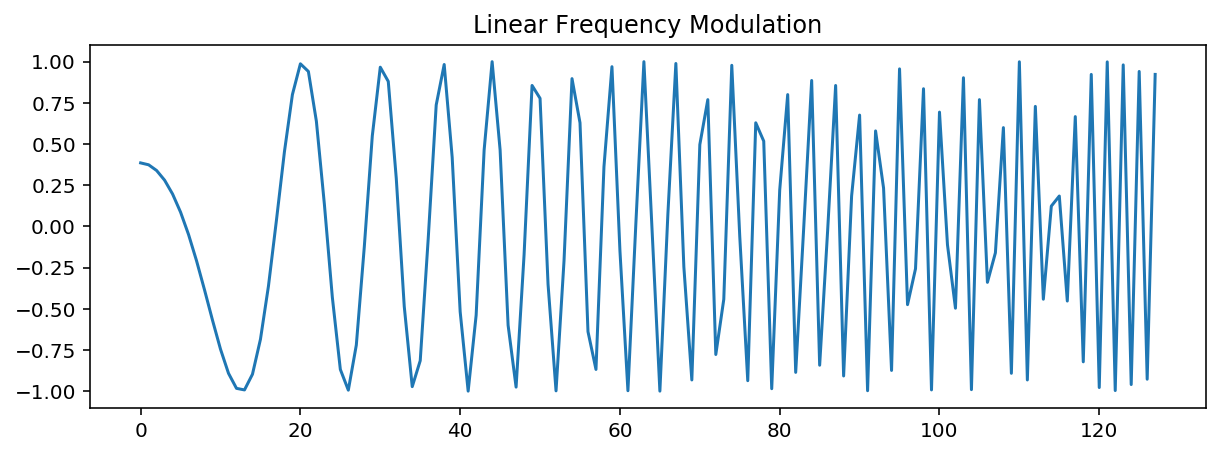

In [ ]:
from tftb.generators import fmlin

n_points = 128
fmin, fmax = 0.0, 0.5
signal, _ = fmlin(n_points, fmin, fmax)

plt.plot(signal.real)
plt.title("Linear Frequency Modulation")
plt.show()

From this time-domain representation, it is difficult to say what kind of modulation is contained in this signal: what
are the initial and final frequencies, is it a linear, parabolic, hyperbolic... frequency modulation?

If we now consider the energy spectrum of the signal z by squaring the modulus of its Fourier transform (using the
numpy.fft.fft function):

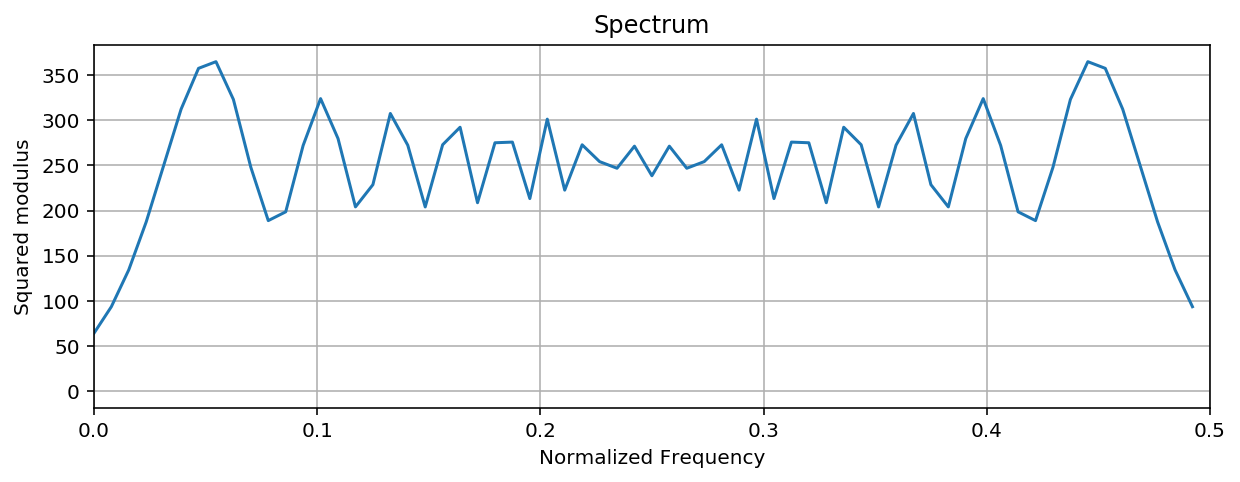

In [ ]:
from tftb.generators import fmlin
import matplotlib.pyplot as plt
import numpy as np

dsp1 = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)
plt.plot(np.arange(-(len(signal) // 2), len(signal) // 2, dtype=float) / len(signal), dsp1)
plt.xlim(fmin, fmax)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

we still can not say, from this plot, anything about the evolution in time of the frequency content. This is due to the
fact that the Fourier transform is a decomposition on complex exponentials, which are of infinite duration and
completely unlocalized in time. Time information is in fact encoded in the phase of the Fourier transform (which is
simply ignored by the energy spectrum), but their interpretation is not straightforward and their direct extraction is
faced with a number of difficulties such as phase unwrapping. In order to have a more informative description of such
signals, it would be better to directly represent their frequency content while still keeping the time description
parameter. This is precisely the aim of time-frequency analysis. To illustrate this, let us try the Wigner-Ville
distribution on this signal.

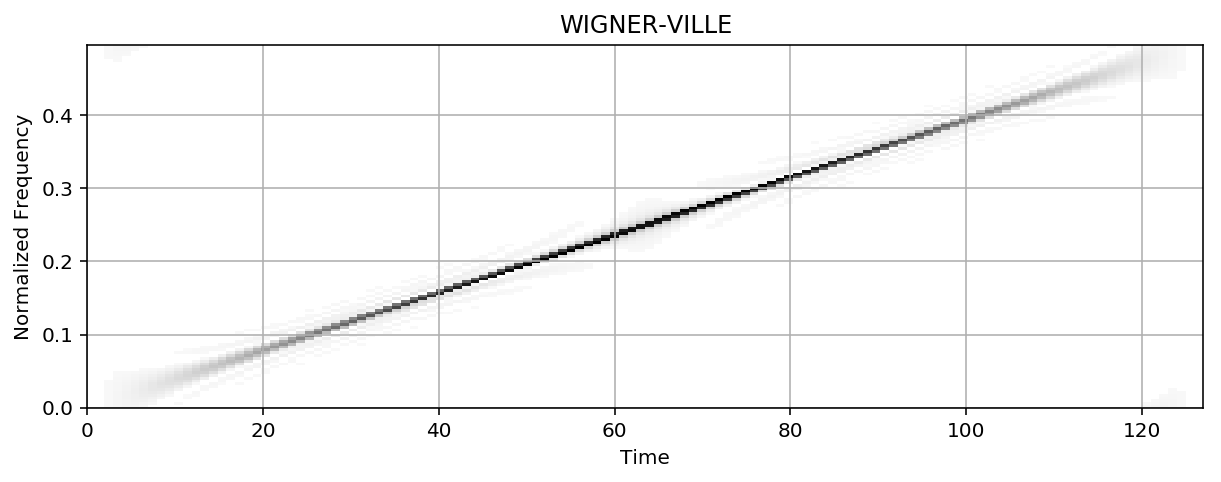

In [ ]:
from tftb.processing import WignerVilleDistribution
wvd = WignerVilleDistribution(signal)
wvd.run()
wvd.plot(kind='cmap')

we can see that the linear progression of the frequency with time, from 0 to 0.5, is clearly shown.

If we now add some complex white gaussian noise on this signal,

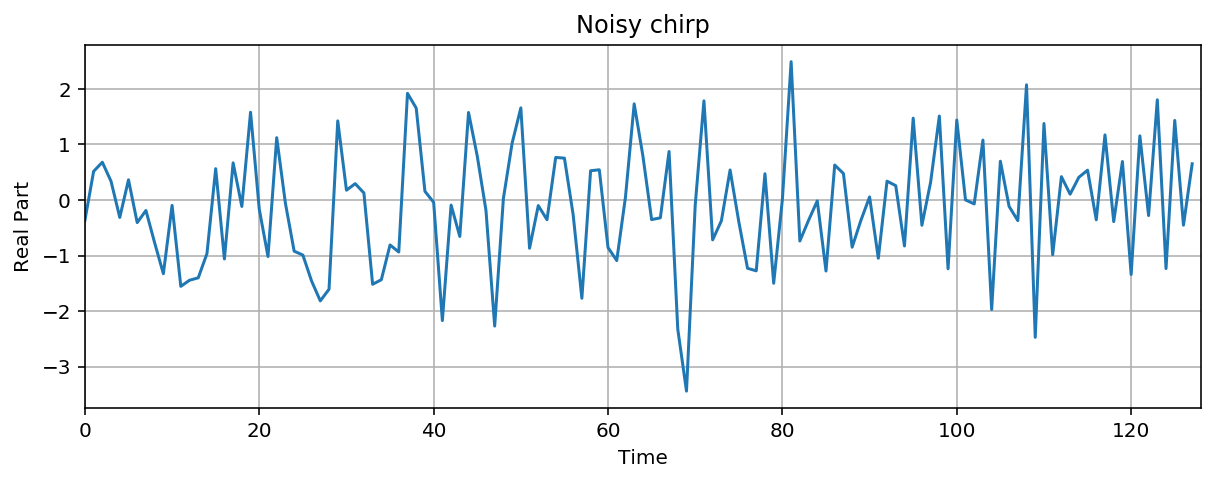

In [ ]:
from tftb.generators import sigmerge, noisecg
noisy_signal = sigmerge(signal, noisecg(len(signal)), 0)
plt.plot(np.real(noisy_signal))
plt.xlim(0, len(signal))
plt.title('Noisy chirp')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

and consider the spectrum of it,

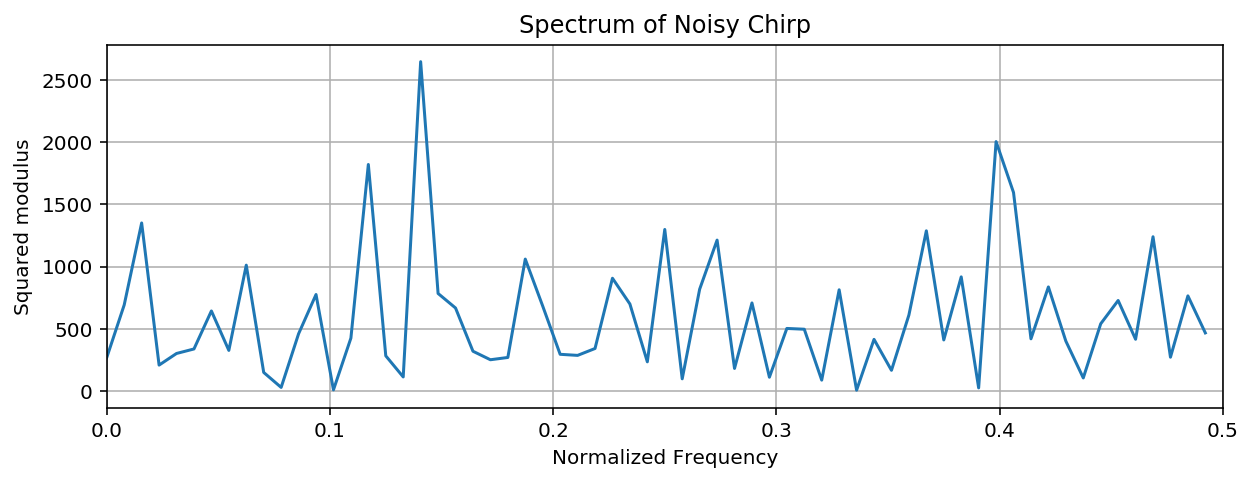

In [ ]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(noisy_signal)) ** 2)
plt.plot(np.arange(-(len(signal) // 2), len(signal) // 2, dtype=float) / len(signal), dsp1)
plt.xlim(fmin, fmax)
plt.title('Spectrum of Noisy Chirp')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

it is worse than before to interpret these plots. On the other hand, the Wigner-Ville distribution still show quite
clearly the linear progression of the frequency with time.

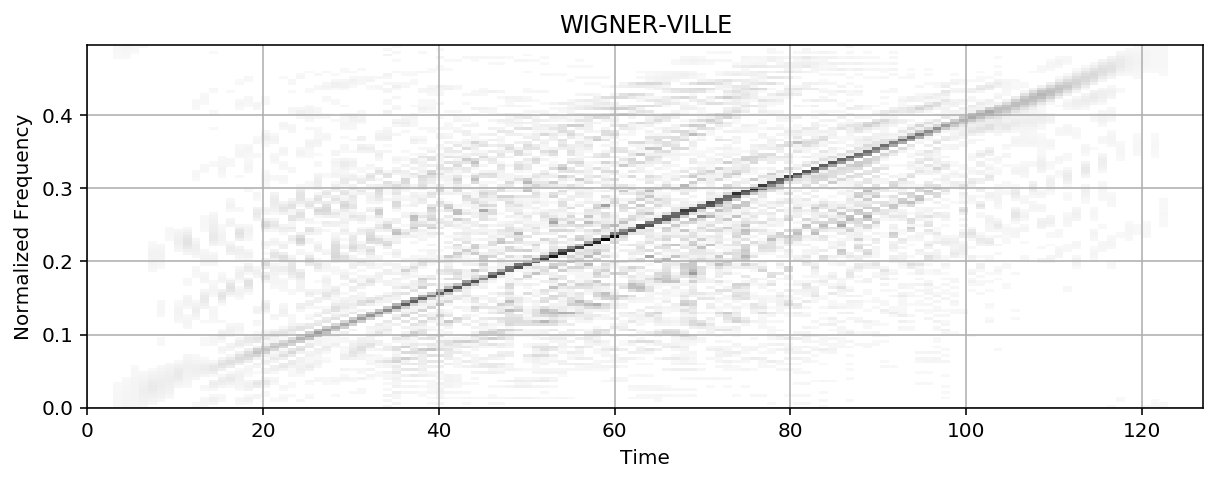

In [ ]:
wvd = WignerVilleDistribution(noisy_signal)
wvd.run()
wvd.plot(kind='cmap')

# Spectrograms

In the spirit of Example 2, let's also look at the spectrogram for each of these signals:

In [ ]:
from scipy.signal import hamming
from tftb.processing import Spectrogram

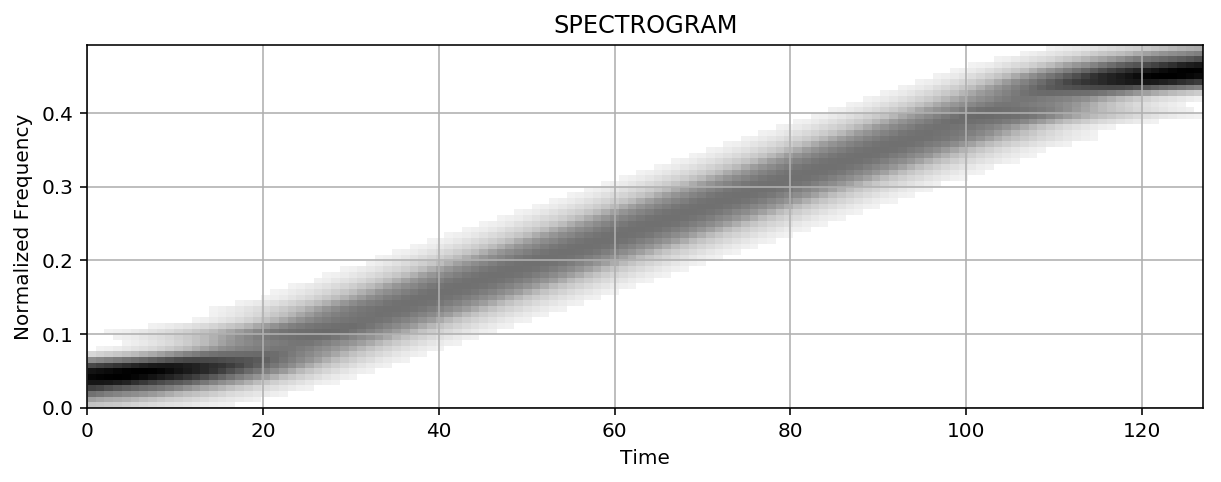

In [ ]:
# signal (chirp)
spec = Spectrogram(signal, n_fbins=len(signal), fwindow=hamming(65))
spec.run()
spec.plot(kind='cmap', threshold=0.1, show_tf=False)

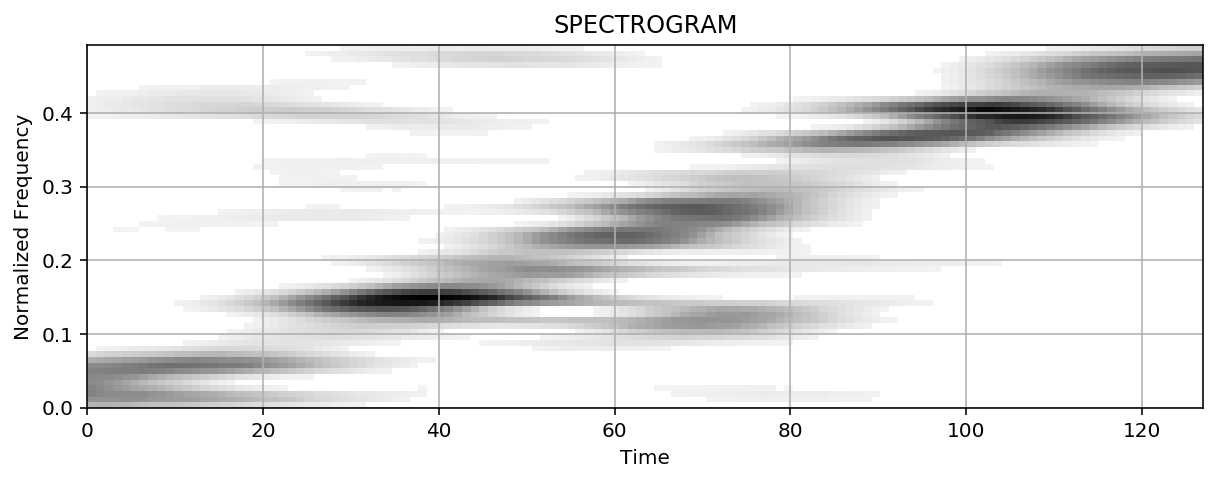

In [ ]:
# noisy_signal (noisy chirp)
spec = Spectrogram(noisy_signal, n_fbins=len(signal), fwindow=hamming(65))
spec.run()
spec.plot(kind='cmap', threshold=0.1, show_tf=False)

# Ambiguity function
- https://en.wikipedia.org/wiki/Ambiguity_function

In [ ]:
from tftb.processing import ambiguity

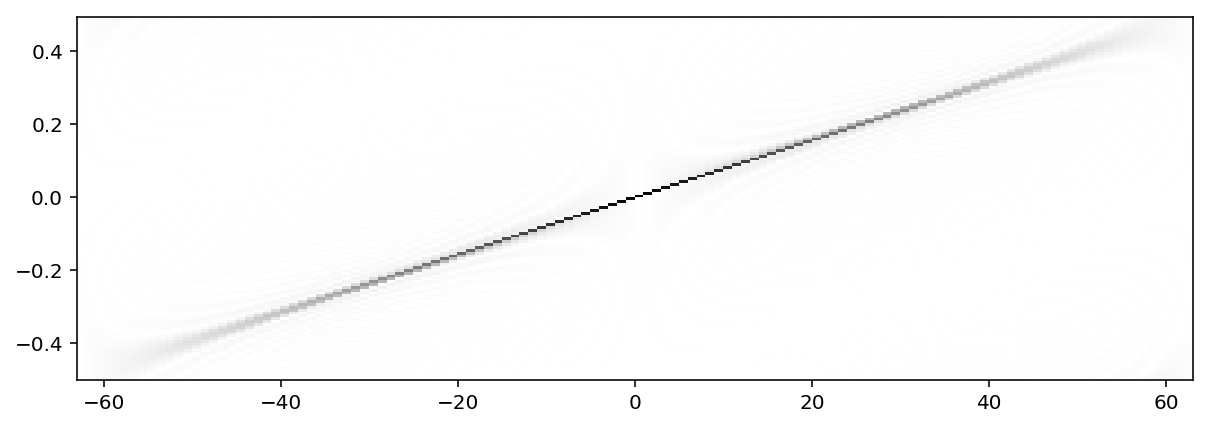

In [ ]:
# Narrow band [https://en.wikipedia.org/wiki/Ambiguity_function]
display(Image(url='https://wikimedia.org/api/rest_v1/media/math/render/svg/7fd591e0bed0a213e4852d92b251de9c0ff93231'))
amb, lag, doppler = ambiguity.narrow_band(signal)
plt.pcolormesh(lag, doppler, np.abs(amb))
plt.show()

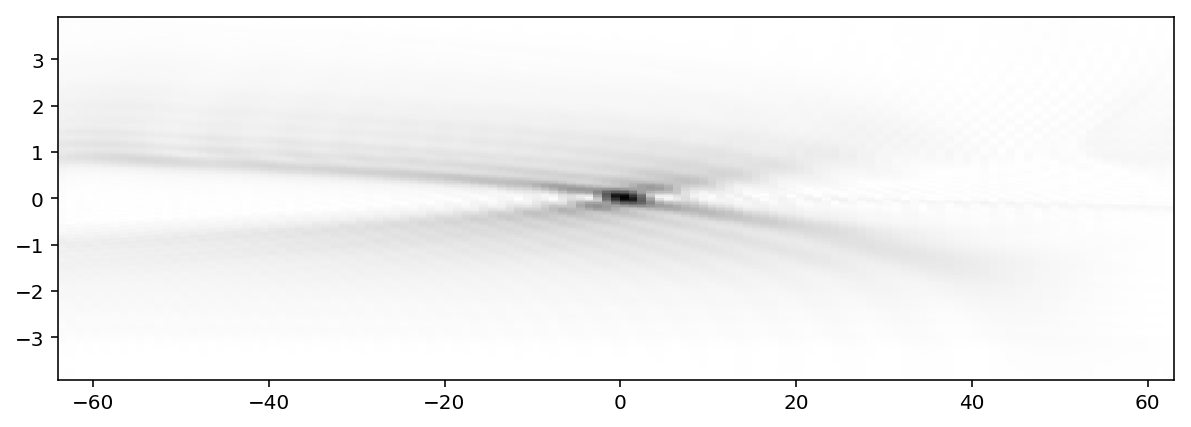

In [ ]:
# Wide band [https://en.wikipedia.org/wiki/Ambiguity_function#Wideband_ambiguity_function]
display(Image(url='https://wikimedia.org/api/rest_v1/media/math/render/svg/128a8ff1a7e1b85aed06c80460673ab5b907ce4a'))
amb, lag, doppler = ambiguity.wide_band(signal)
plt.pcolormesh(lag, doppler, np.abs(amb))
plt.show()